# Tech Stock Prices
This dataset consists of the daily stock prices and volume of ten different tech companies: Apple (AAPL), Amazon (AMZN), Alibaba (BABA), Salesforce (CRM), Facebook (FB), Alphabet (GOOG), Intel (INTC), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

There are ten CSV files in the `data/` folder named with the stock symbol for each of the ten companies listed above. 
Looking for another company? You can download it from [Yahoo Finance](https://finance.yahoo.com/) and upload it to your workspace.

Not sure where to begin? Scroll to the bottom to find challenges!

In [2]:
import pandas as pd
aapl = pd.read_csv("data/AAPL.csv")
print(aapl.shape)
aapl.head(100)

(2999, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459939,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447999,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490865,447610800
...,...,...,...,...,...,...,...
95,2010-05-20,8.638571,8.708929,8.436071,8.491429,7.280255,1282915200
96,2010-05-21,8.315000,8.732143,8.262500,8.654286,7.419883,1223891200
97,2010-05-24,8.831429,8.960714,8.795000,8.812857,7.555838,754238800
98,2010-05-25,8.548214,8.812857,8.470000,8.757857,7.508681,1048006400


## Data Dictionary

| Column    | Explanation                                                                            |
| --------- | -------------------------------------------------------------------------------------- |
| Date      | Date of observation                                                                    |
| Open      | Opening price                                                                          |
| High      | Highest price during trading day                                                       |
| Low       | Lowest price during trading day                                                        |
| Close     | Close price                                                                            |
| Adj Close | Adjusted close price adjusted for splits and dividend and/or capital gain distribution |
| Volume    | Number of shares traded during trading day                                             |

[Source](https://finance.yahoo.com/) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the ten companies has the highest closing price based on the most recent data?
- 📊 **Visualize**: Create a plot that visualizes the closing price at the end of each month for the 10 tech stocks.
- 🔎 **Analyze**: Which of the ten companies have experienced the greatest percent increase in closing price over the course of their existence?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have been hired as an analyst for a small investment firm. They currently specialize in commodities, focusing on coffee, cocoa, and sugar. However, they are now interested in expanding to technology companies. Your manager has asked you to explore the returns and volatilities of the ten stocks provided and contrast them with the three commodities they currently invest in. 

They also want you to recommend how tech stocks could be integrated into a portfolio with the existing commodities they invest in to minimize risk while gaining exposure to the new market.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

Commodity prices can be found [here](https://finance.yahoo.com/commodities/).

## Exploratory Data Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
aapl.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,2999,2999,2010-01-04,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Open,2999.0,NaN,NaN,NaN,41.741022,36.499461,6.870357,18.4325,28.1325,47.77125,161.679993
High,2999.0,NaN,NaN,NaN,42.170738,36.919202,7.0,18.613214,28.4375,47.9975,165.699997
Low,2999.0,NaN,NaN,NaN,41.314441,36.090713,6.794643,18.238571,27.885,47.3775,161.0
Close,2999.0,NaN,NaN,NaN,41.760973,36.528357,6.858929,18.472321,28.1625,47.737499,165.300003
Adj Close,2999.0,NaN,NaN,NaN,40.017151,37.023456,5.880607,16.105654,25.993275,46.150312,165.300003
Volume,2999.0,NaN,NaN,NaN,271425636.945649,226347327.631566,41000000.0,109804350.0,185859200.0,372465800.0,1880998000.0


In [5]:
aapl.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [20]:
aapl['Close'].sort_values(ascending=False)

2998    165.300003
2995    161.940002
2994    161.410004
2993    161.020004
2992    160.550003
           ...    
26        6.968571
19        6.954643
24        6.932857
18        6.859286
22        6.858929
Name: Close, Length: 2999, dtype: float64

In [10]:
aapl.info

<bound method DataFrame.info of             Date        Open        High  ...       Close   Adj Close     Volume
0     2010-01-04    7.622500    7.660714  ...    7.643214    6.553025  493729600
1     2010-01-05    7.664286    7.699643  ...    7.656429    6.564355  601904800
2     2010-01-06    7.656429    7.686786  ...    7.534643    6.459939  552160000
3     2010-01-07    7.562500    7.571429  ...    7.520714    6.447999  477131200
4     2010-01-08    7.510714    7.571429  ...    7.570714    6.490865  447610800
...          ...         ...         ...  ...         ...         ...        ...
2994  2021-11-23  161.119995  161.800003  ...  161.410004  161.410004   96041900
2995  2021-11-24  160.750000  162.139999  ...  161.940002  161.940002   69463600
2996  2021-11-26  159.570007  160.449997  ...  156.809998  156.809998   76959800
2997  2021-11-29  159.369995  161.190002  ...  160.240005  160.240005   88748200
2998  2021-11-30  159.990005  165.520004  ...  165.300003  165.300003  173758

In [12]:
aapl.nunique()

Date         2999
Open         2875
High         2855
Low          2870
Close        2881
Adj Close    2958
Volume       2992
dtype: int64

In [13]:
aapl.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Separating the Categorical and Numerical Data

In [15]:
cat_cols=aapl.select_dtypes(include=['object']).columns
num_cols = aapl.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Date'], dtype='object')
Numerical Variables:
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


array([[<AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'High'}>],
       [<AxesSubplot: title={'center': 'Low'}>,
        <AxesSubplot: title={'center': 'Close'}>],
       [<AxesSubplot: title={'center': 'Adj Close'}>,
        <AxesSubplot: title={'center': 'Volume'}>]], dtype=object)

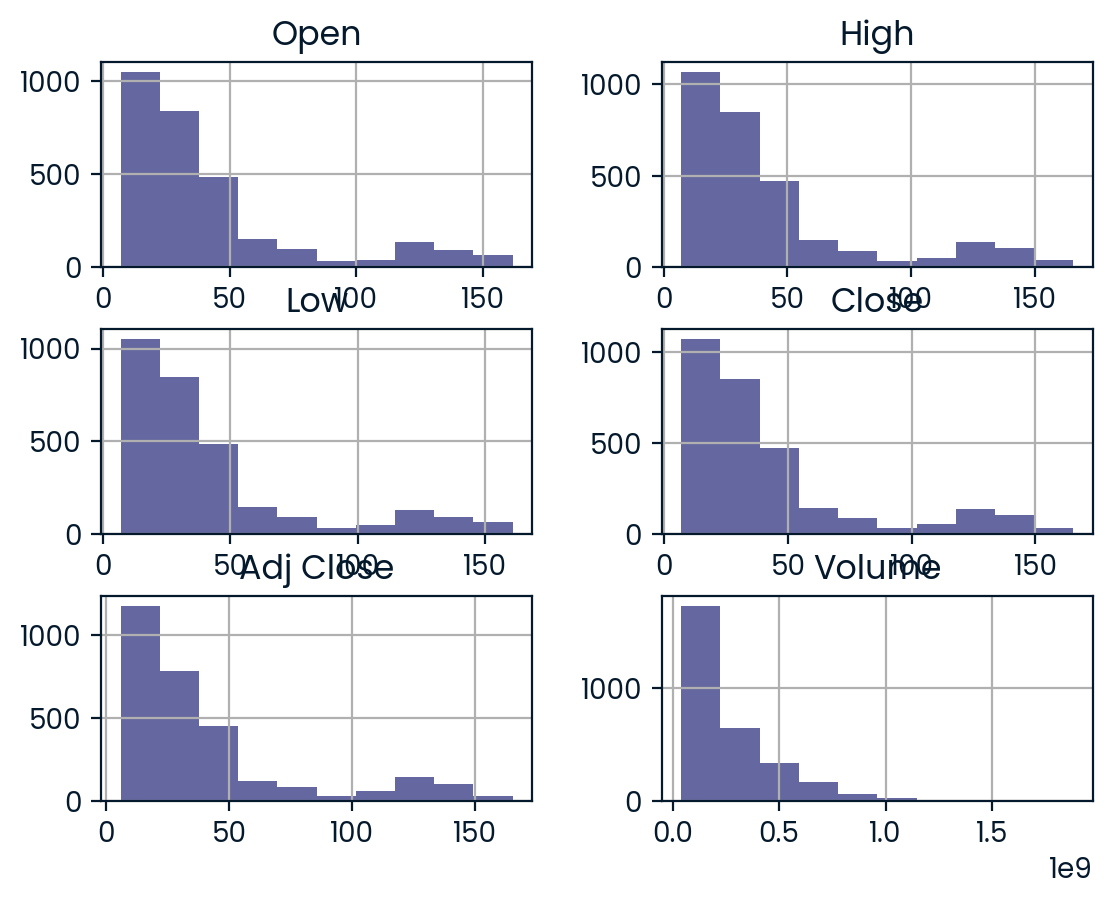

In [23]:
aapl.hist()

Open
Skew : 1.69


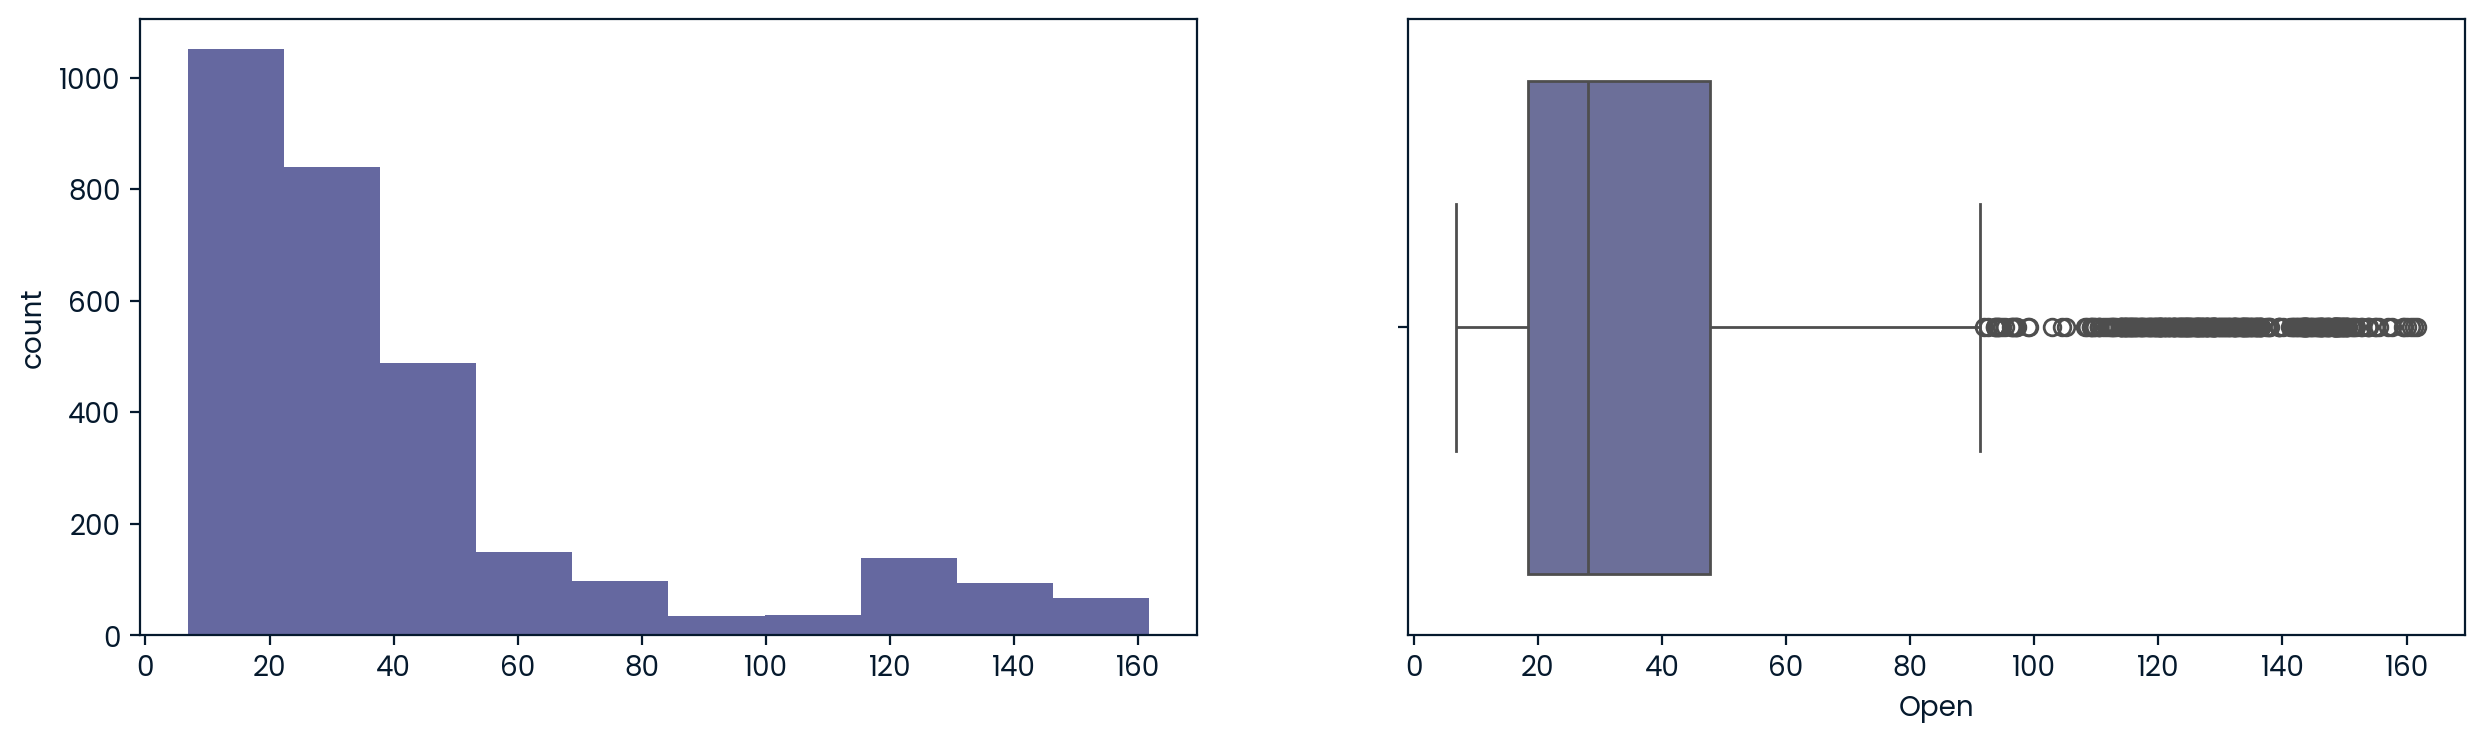

High
Skew : 1.69


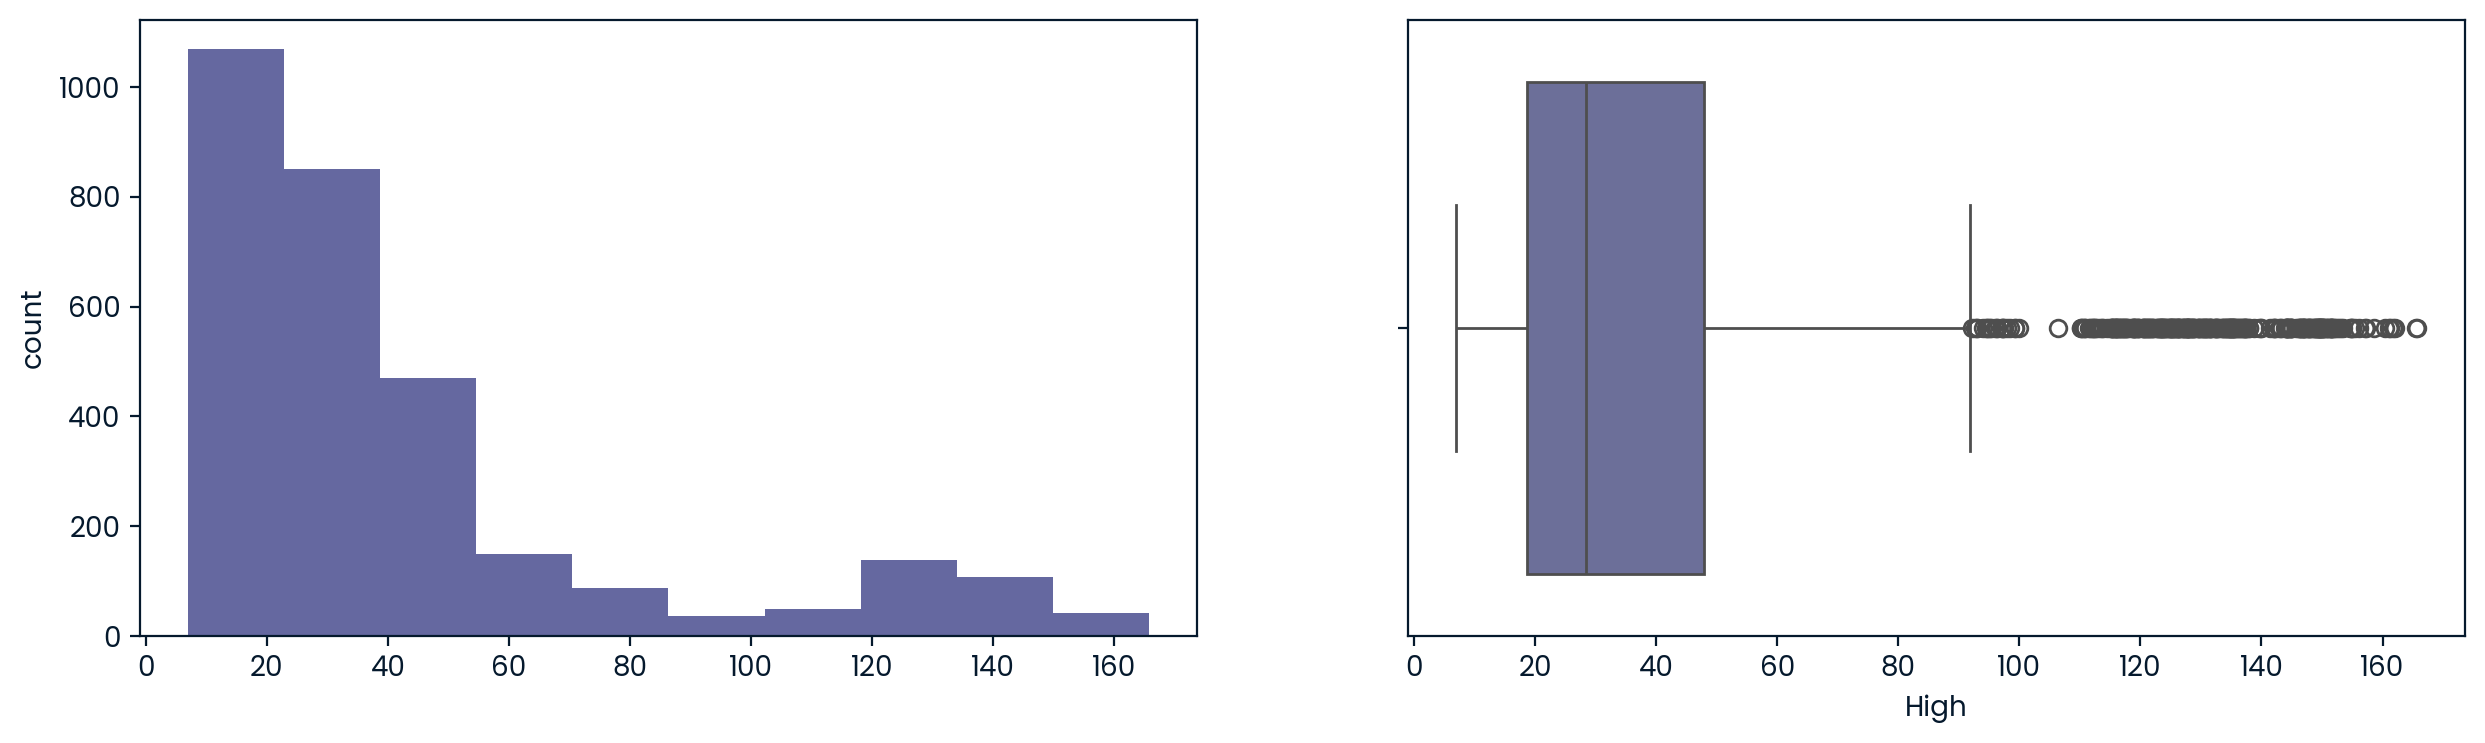

Low
Skew : 1.7


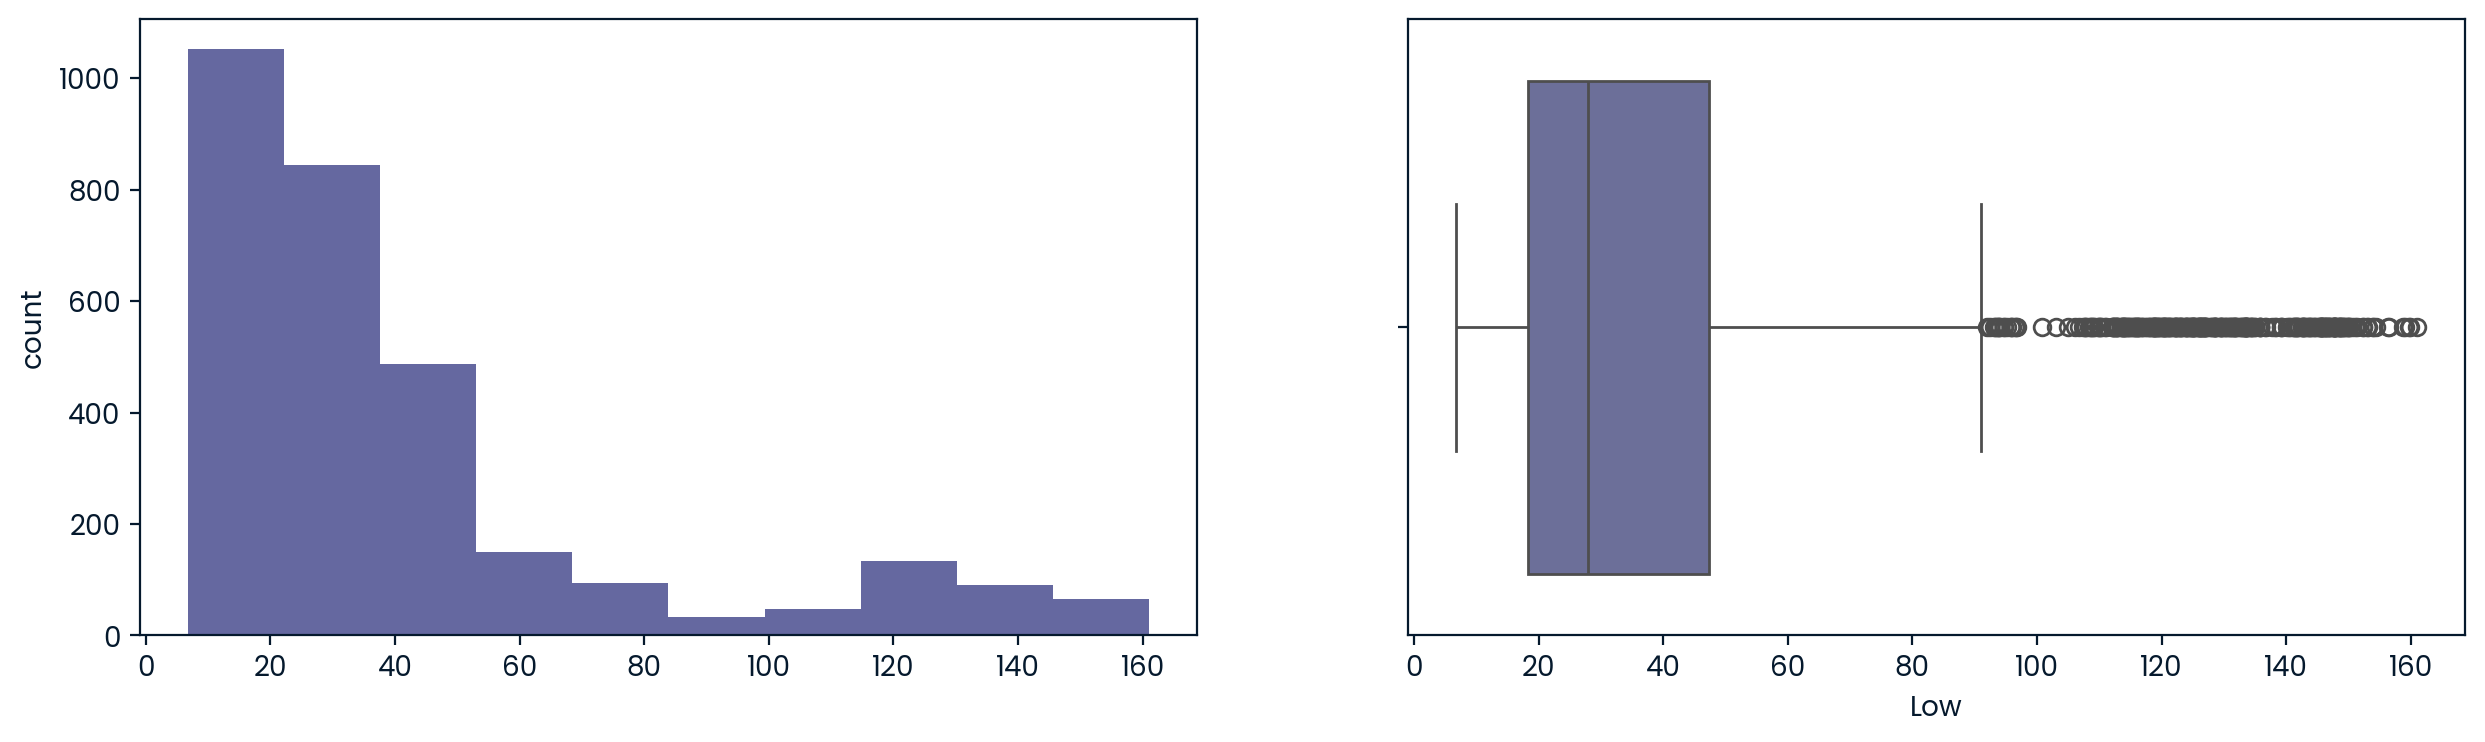

Close
Skew : 1.69


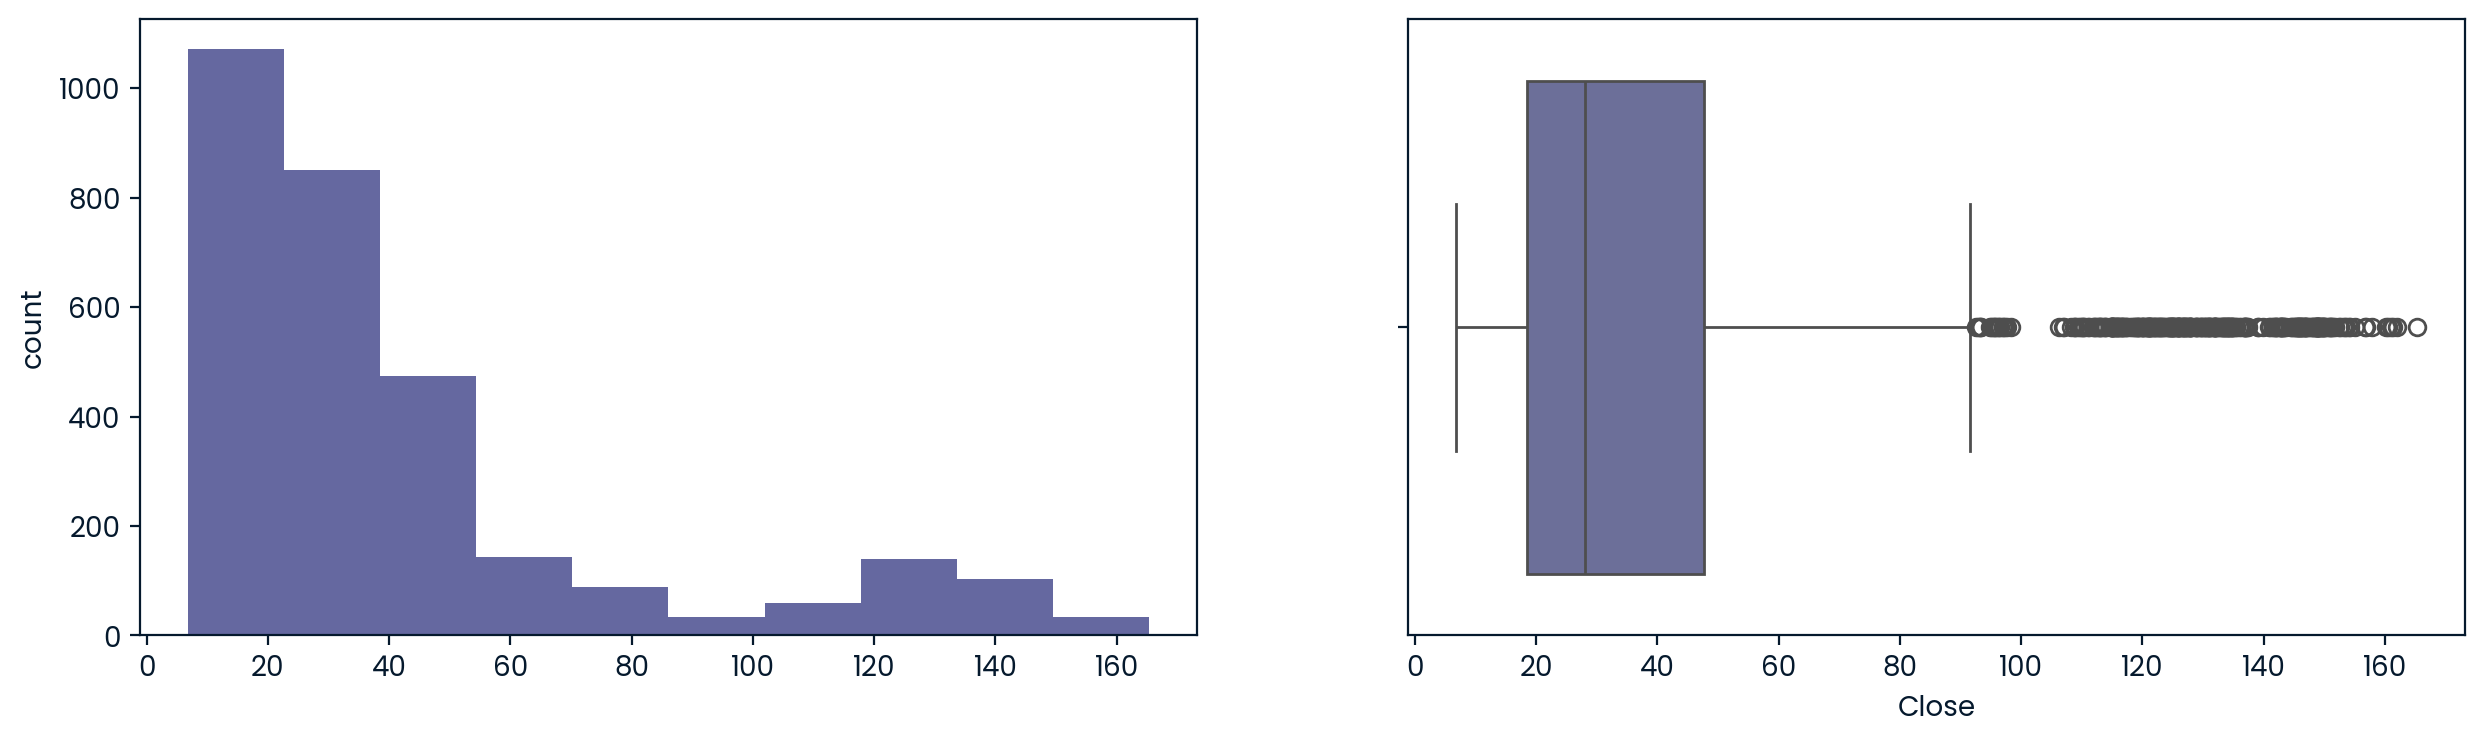

Adj Close
Skew : 1.7


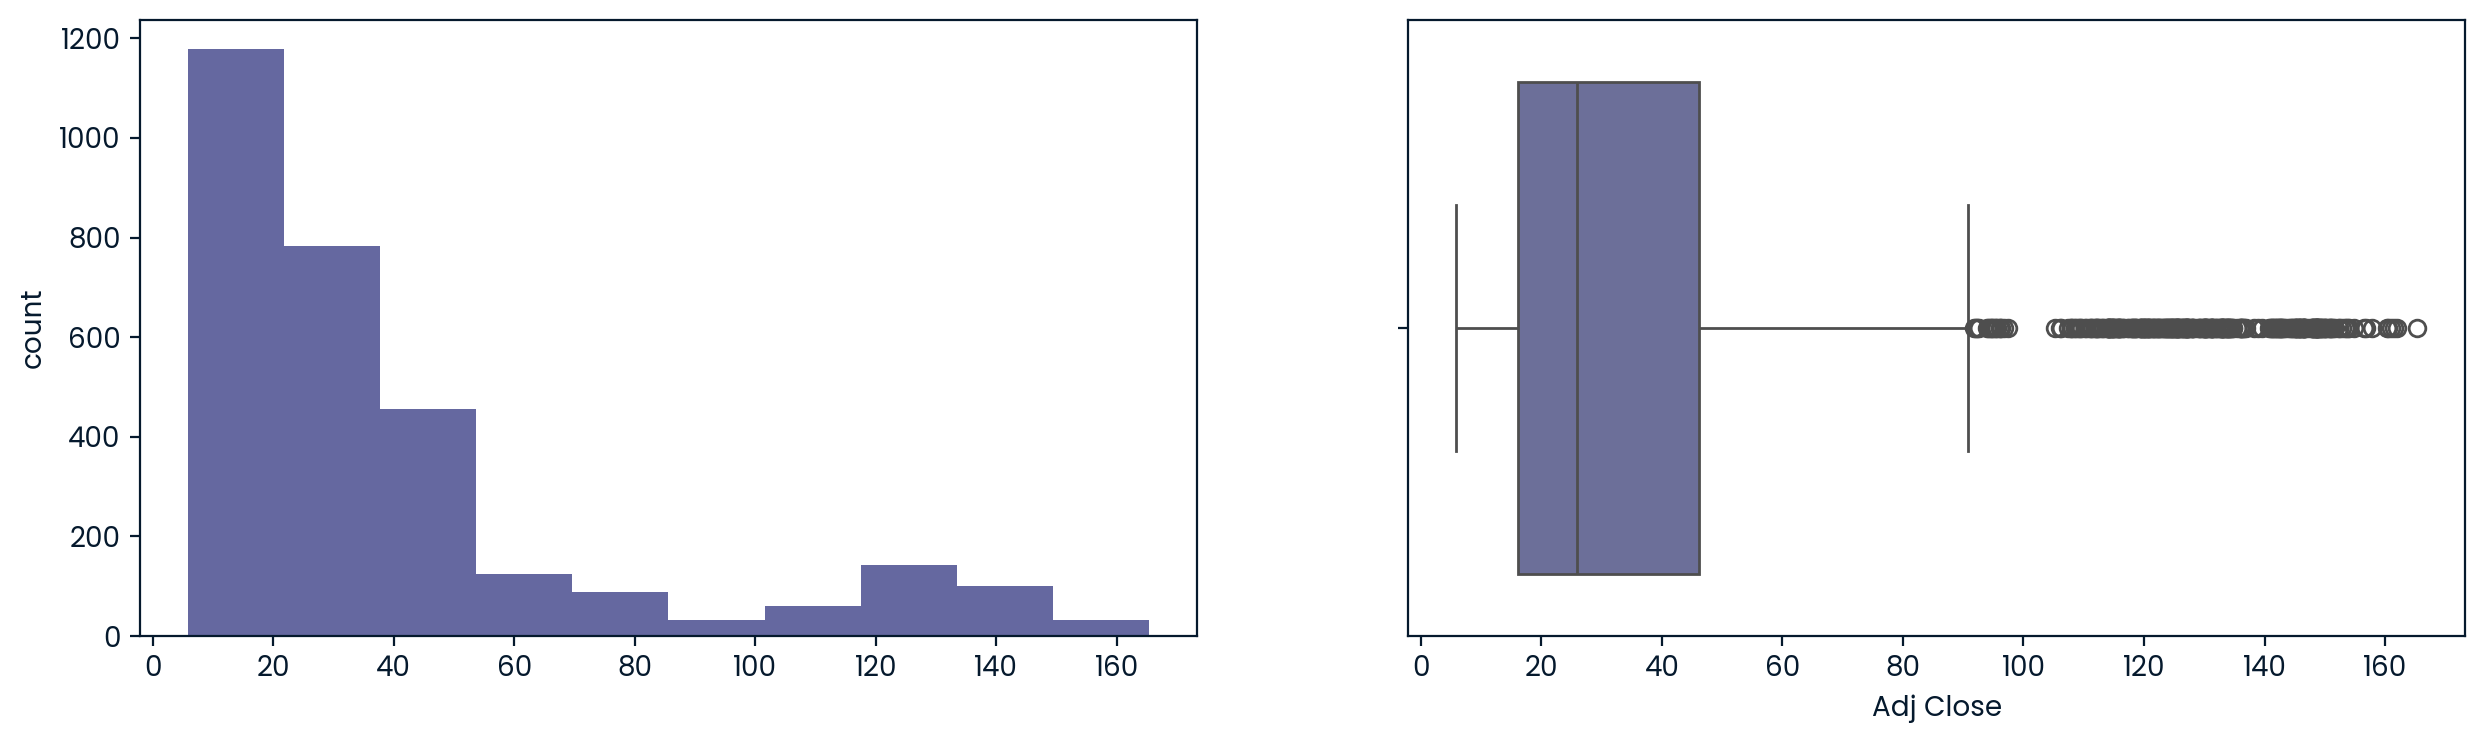

Volume
Skew : 1.95


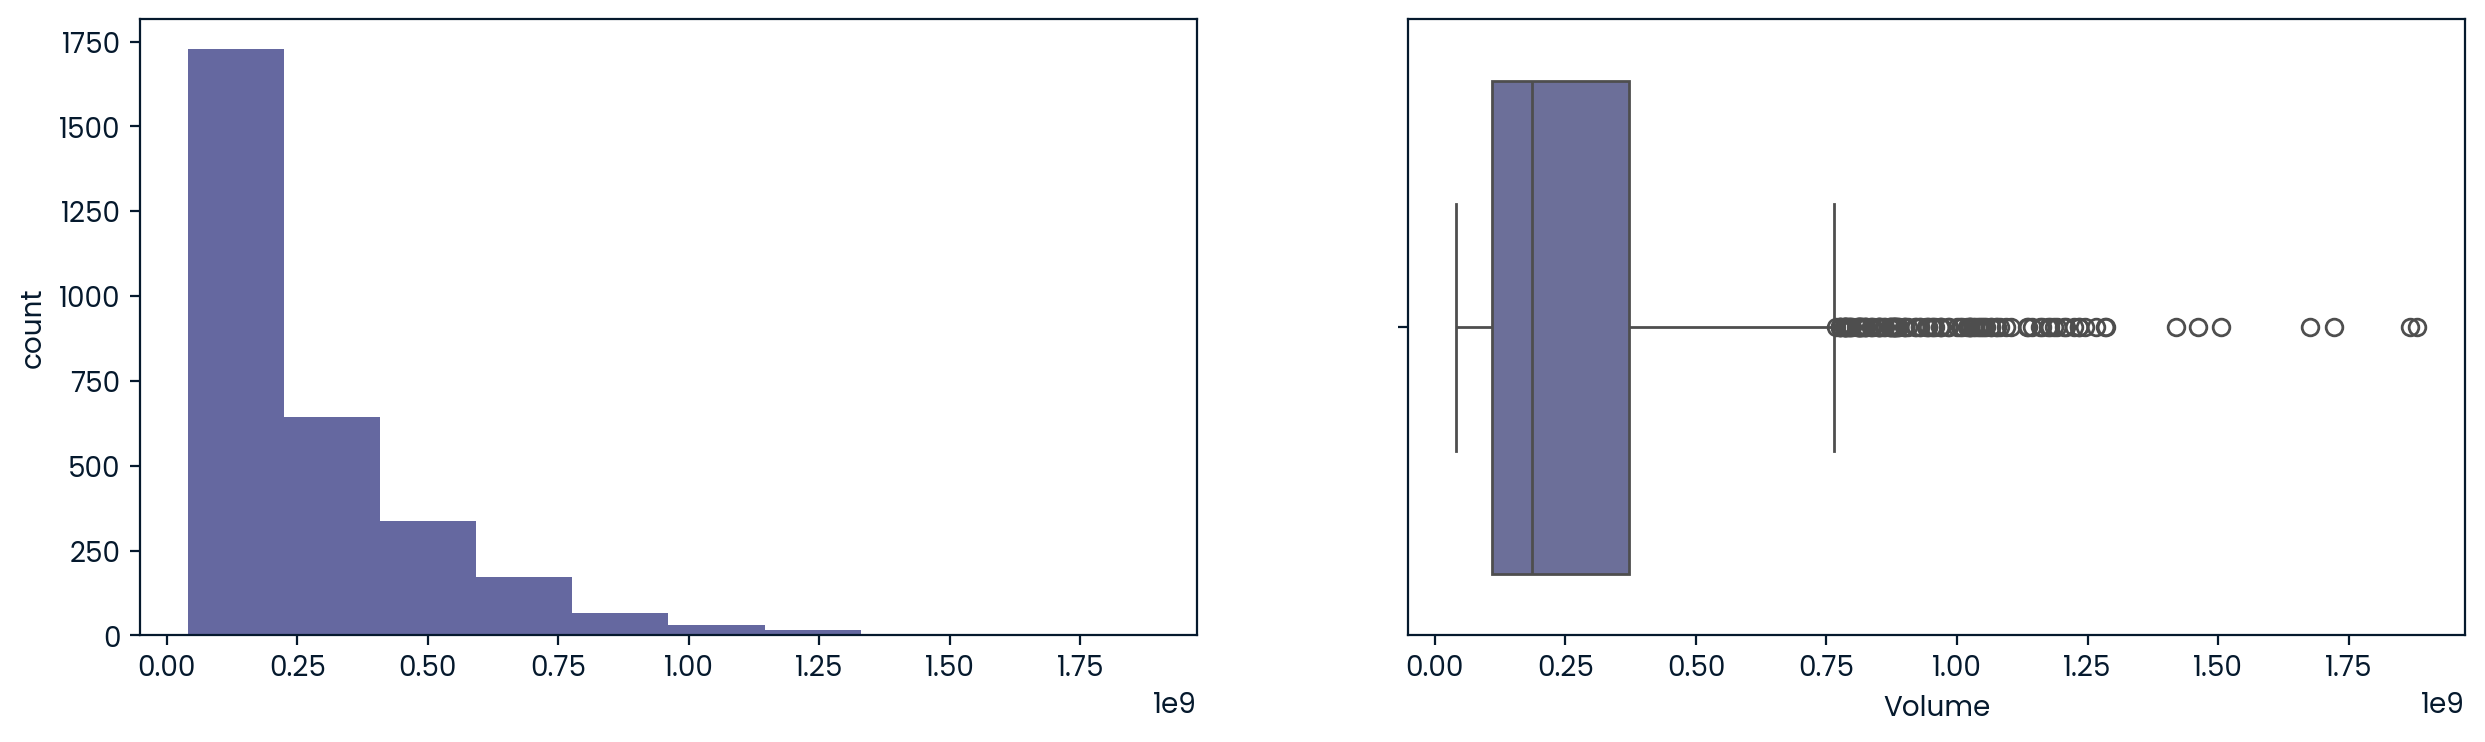

In [16]:
for col in num_cols:
    print(col)
    print('Skew :', round(aapl[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    aapl[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=aapl[col])
    plt.show()

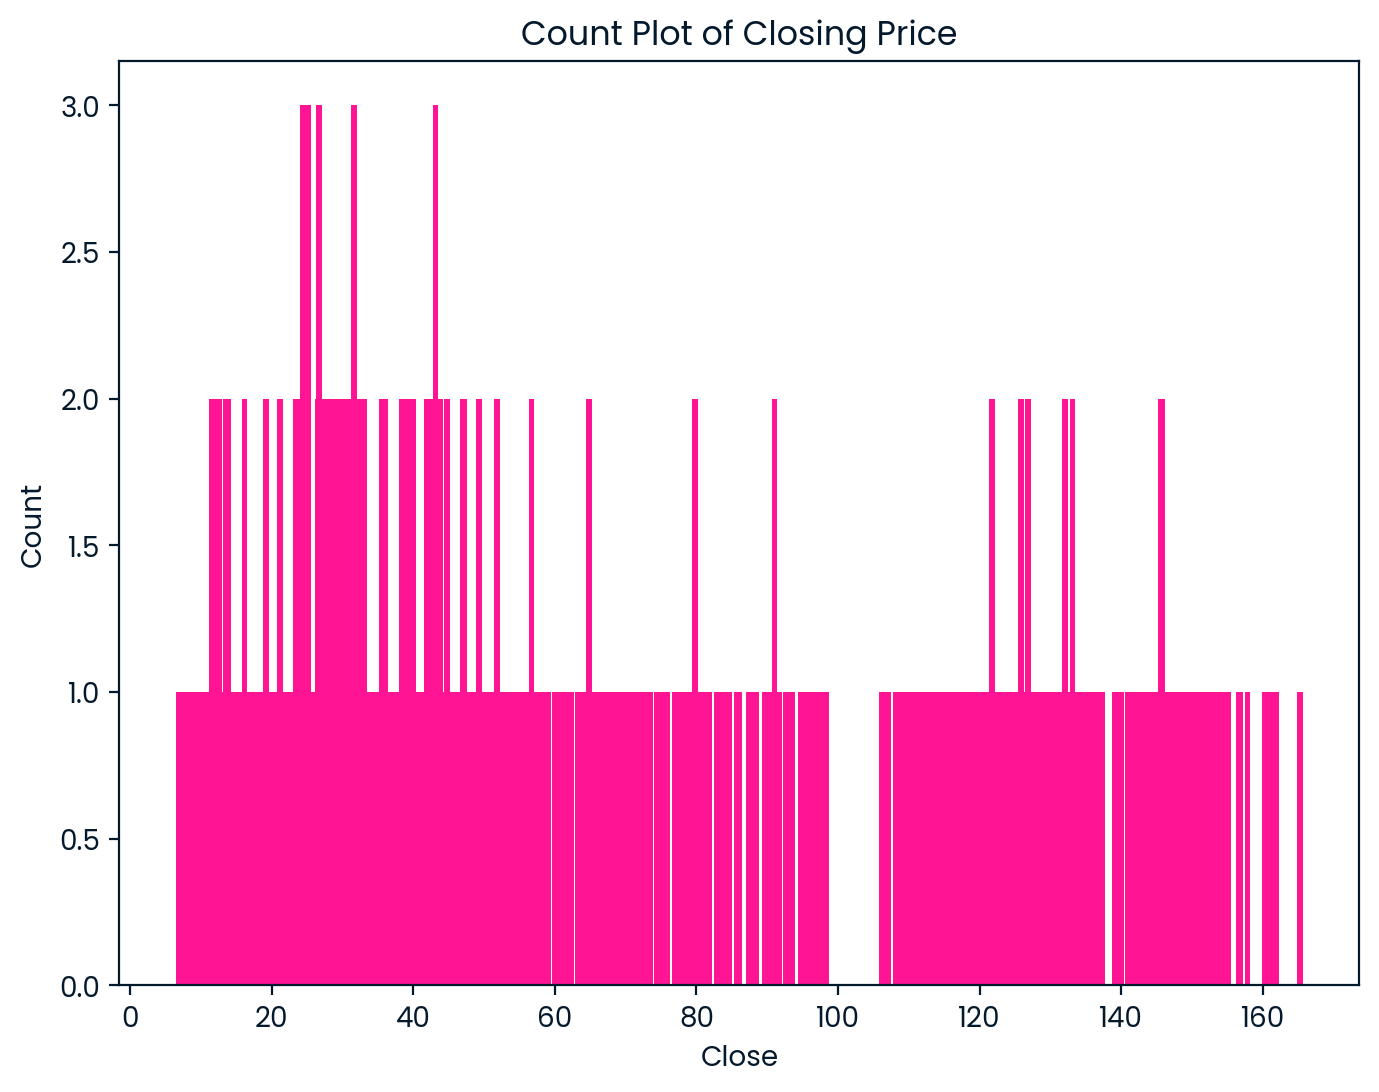

In [27]:
import matplotlib.pyplot as plt

close_counts = aapl['Close'].value_counts() 

# Using Matplotlib to create a count plot 
plt.figure(figsize=(8, 6)) 
plt.bar(close_counts.index, close_counts, color='deeppink') 
plt.title('Count Plot of Closing Price') 
plt.xlabel('Close') 
plt.ylabel('Count') 
plt.show()

<AxesSubplot: >

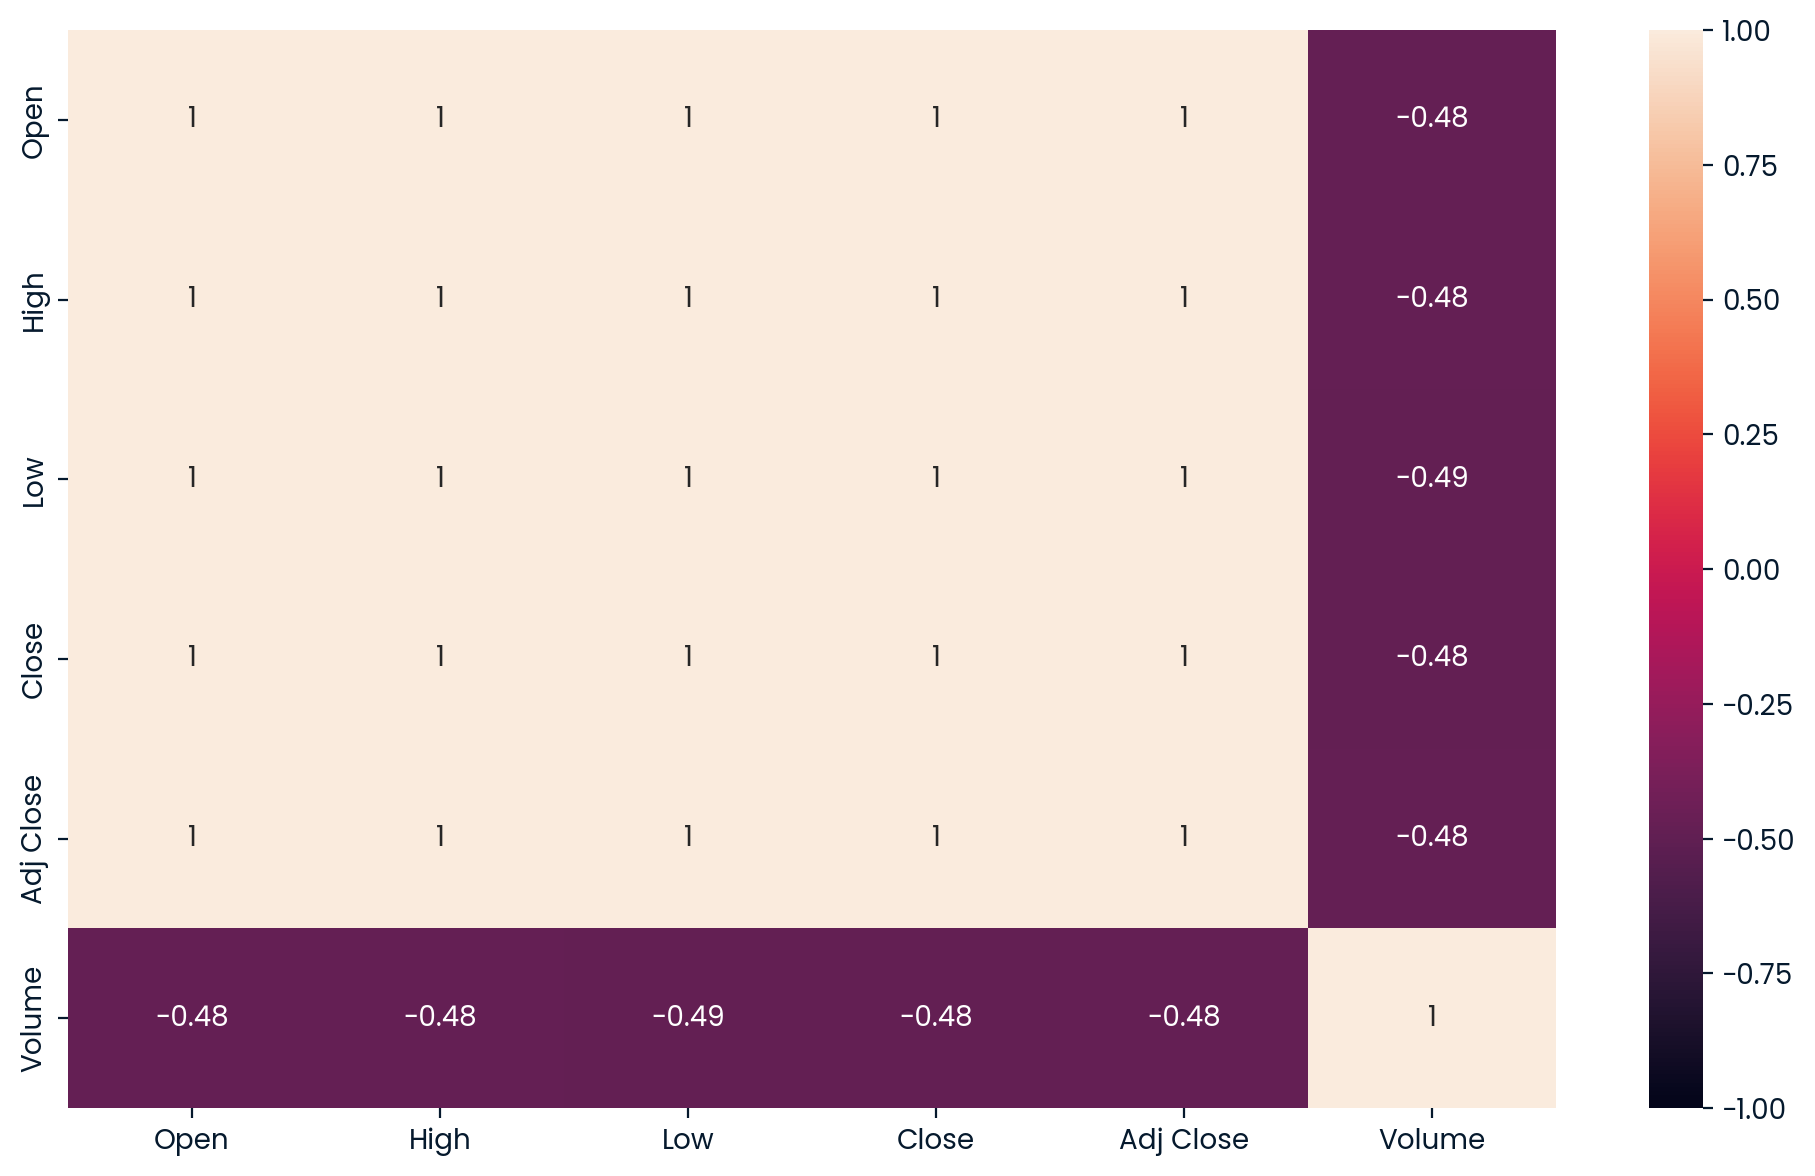

In [18]:
# Ensure that the 'aapl' DataFrame is properly formatted for a heatmap
# For a heatmap, the data should be numeric. If 'aapl' contains dates or other non-numeric data, it needs to be handled.

# Assuming 'aapl' is a DataFrame and we need to convert it to a correlation matrix
aapl_corr = aapl.corr()

plt.figure(figsize=(12, 7))
sns.heatmap(aapl_corr, annot=True, vmin=-1, vmax=1)